# MULTICLASS CLASSIFICATION MODEL :

In [3]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
import keras 
from keras.utils import np_utils

In [4]:
warnings.filterwarnings('ignore')

In [5]:
#importing the data
data = pd.read_csv('root2ai - Data.csv')
data.head(5).append(data.tail(5))

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
22699,fourth study discusses blockchain technology e...,Reg Tech
22700,book finishes stating biggest issue emerging F...,Reg Tech
22701,people culture cess,Reg Tech
22702,author challenges execu tive lead change stop ...,Reg Tech
22703,change data driven culture come bottom must start,Reg Tech


In [6]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Navaneeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
data.shape

(22704, 2)

In [8]:
data.Target.value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        977
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

In [9]:
data.isnull().sum()

Text      3
Target    0
dtype: int64

In [10]:
data.Text[data.Text.isna()]

16661    NaN
16940    NaN
17073    NaN
Name: Text, dtype: object

In [11]:
#Data cleaning
corpus = []
for i in range(0, 22704):
    text = re.sub('[^a-zA-Z]', ' ', str(data['Text'][i]))
    text = text.lower()
    text = text.split()
    #ps = PorterStemmer()
    all_stopwords = stopwords.words("english")
    text = [word for word in text if not word in set(all_stopwords)]
    text = ' '.join(text)
    corpus.append(text)

In [12]:
print(corpus[:10])

['reserve bank forming expert committee based institute development research banking technology study approach distributed ledger technology help support shift', 'director could play role financial system', 'preliminary discuss secure transaction study research payment', 'security indeed prove essential transforming financial system part effort move away heavy reliance cash based', 'bank settlement normally take three days based payment verification technology take less tier security', 'agarwal head bank', 'several data security regulatory oversight would need widely financial system', 'relevance transaction register available publicly sequential record serve effective tool transaction settlement among different payment chain chief risk officer global business', 'technology need transaction intermediary clearinghouse financial establishment thus quick secure inexpensive', 'seven bank morgan chase already support certain cross border fortune']


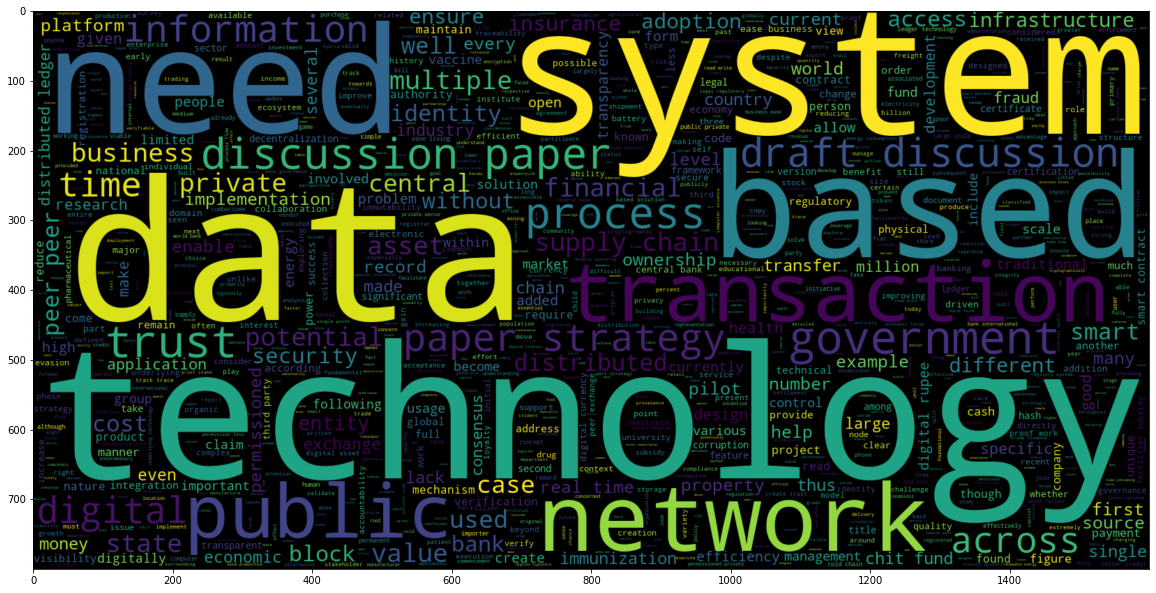

In [13]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(data.Text[data.Target == 'Blockchain']))
plt.imshow(wc , interpolation = 'bilinear')

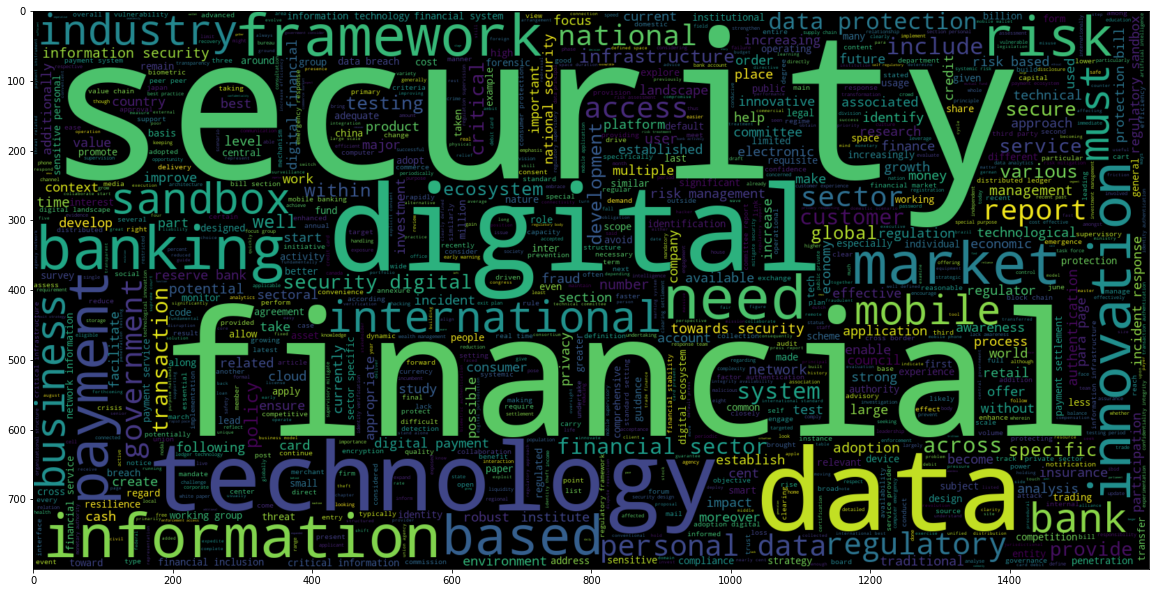

In [14]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(data.Text[data.Target == 'Cyber Security']))
plt.imshow(wc , interpolation = 'bilinear')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 11349)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [16]:
len(X[4])

11349

In [17]:
#encoding multiclass labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [19]:
X_train[10]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
y

array([1, 1, 1, ..., 7, 7, 7])

In [24]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(f"Confusion_matrix :\n {cm},\n\n\n Accuracy_score : {ac}\n\n")
print('*' * 20,'CLASSIFICATION REPORT', '*' * 20)
print(classification_report(y_test, y_pred))

Confusion_matrix :
 [[ 326    5   14    1   74    4    1   35    2    2    4]
 [   1  127   17    0  111    0    0    0    0    2    3]
 [   2    6  281    0  209    2    0    7    1    1    6]
 [   2    0   35    0   24    0    1    0    0    1    4]
 [  15   12   55    0 1593   11   12   11    4   11   32]
 [   0    2    3    0  106   84    1    0    1    1    1]
 [   0    0    8    0  169    1   21    0    0    0    5]
 [  18    1    4    3   45    2    4  354    1    1    0]
 [   2    2    7    0  111    2    0    0   18    1    6]
 [   4    1    7    0   76    0    0    0    0   72    1]
 [   6    5   12    0  127    0    0    3    0    2  173]],


 Accuracy_score : 0.671438009249064


******************** CLASSIFICATION REPORT ********************
              precision    recall  f1-score   support

           0       0.87      0.70      0.77       468
           1       0.79      0.49      0.60       261
           2       0.63      0.55      0.59       515
           3       